In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [55]:
top_image_dir = '/orions4-zfs/projects/optas/DATA/Images/Shape_Net_Core/2015_Summer_OUT/Rendered_Images/03001627/'
image_view = 'image_p020_t337_r005'
image_files = []
for shape_model in os.listdir(top_image_dir):
    image_files.append(os.path.join(top_image_dir, shape_model, image_view + '.png'))

In [57]:
%matplotlib inline
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
import os

In [89]:
def _parse_function(filename):    
    image_string = tf.constant(filename)
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_png(image_string, channels=4)    
    image = tf.cast(image_decoded, tf.float32)
    return tf.image.resize_image_with_crop_or_pad(image, 280, 280)

#     return image
#     target_height = 128
#     target_width = 128        
#     return  tf.image.resize_image_with_crop_or_pad(image, target_height, target_width)

    smallest_side = 500
    height, width = tf.shape(image)[0], tf.shape(image)[1]
    height = tf.to_float(height)
    width = tf.to_float(width)

    scale = tf.cond(tf.greater(height, width),
                    lambda: smallest_side / width,
                    lambda: smallest_side / height)
    new_height = tf.to_int32(height * scale)
    new_width = tf.to_int32(width * scale)

    resized_image = tf.image.resize_images(image, [new_height, new_width])
    return resized_image

In [90]:
sess = tf.InteractiveSession() 

In [150]:
from PIL import Image

def load_png_and_focus_on_center(image_file, target_w, target_h):
    img = Image.open(image_file);
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    half_target_w = target_w / 2
    half_target_h = target_h /2

    img = img.crop((half_the_width - half_target_w, half_the_height - half_target_h, 
                    half_the_width + half_target_w, half_the_height + half_target_h))

    return np.array(img)

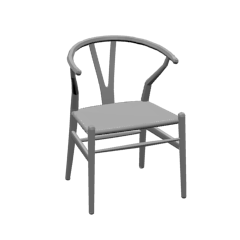

In [157]:
# Image.fromarray(load_png_and_focus_on_center(image_files[500], 240, 240))

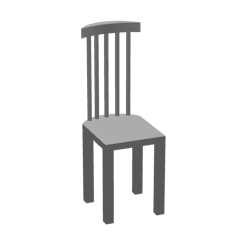

In [143]:
Image.fromarray(pix[:,:,:])

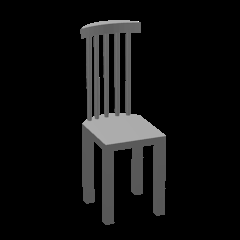

In [142]:
# pix.shape
# Image.fromarray(pix[:,:,:3])

In [92]:
x = sess.run(_parse_function(image_files[i]))

KeyboardInterrupt: 

In [91]:
image_data = []
for i in range(10):
    x = sess.run(_parse_function(image_files[i]))
    image_data.append(x)

KeyboardInterrupt: 

In [ ]:
plt.imshow(image_data[7])

In [ ]:
# target_width = 960.0/540 * target_height